In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import os

os.listdir(r"C:\Users\sudha\Downloads")

['11zon_compressed-PDF.zip',
 '1703569392736.jpg',
 '1703569392742.jpg',
 '1703569392746.jpg',
 '1703569392756 (1).jpg',
 '1703569392756.jpg',
 '1703569392756.pdf',
 '1703569392765 (1).jpg',
 '1703569392765.jpg',
 '1703569392774.jpg',
 '1703569392783 (1).jpg',
 '1703569392783.jpg',
 '1st&2nd sem.pdf',
 '1st&2nd sem_11zon.pdf',
 '22-12-25, 1002 Microsoft Lens.pdf',
 '22-12-25, 1004 Microsoft Lens.pdf',
 '3rd &4th Sem.pdf',
 '3rd &4th Sem_11zon.pdf',
 '3rd&4th sem.pdf',
 '3rd&4th sem_11zon.pdf',
 'A332 ..pdf',
 'A332....pdf',
 'A332.pdf',
 'anuj.mp4',
 'archive (1).zip',
 'archive (2).zip',
 'archive (3).zip',
 'archive.zip',
 'Astra (25).pdf',
 'B330 (1).pdf',
 'B330 (2).pdf',
 'B330...pdf',
 'B330.pdf',
 'beneficiary (1).pdf',
 'beneficiary.pdf',
 'calm-waters-reflect-sunlight-near-a-secluded-island-at-dusk-showcasing-serenity-and-natural-beauty-photo.jpeg',
 'ChatGPT Image Dec 17, 2025, 11_55_29 AM.png',
 'ChatGPT Image Dec 27, 2025, 09_01_17 PM.png',
 'ChatGPT Image Dec 27, 2025, 09_

In [6]:
df = pd.read_csv(r"C:\Users\sudha\Downloads\Mall_Customers.csv")



df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]



In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


C:\Users\sudha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sudha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sudha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sudha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

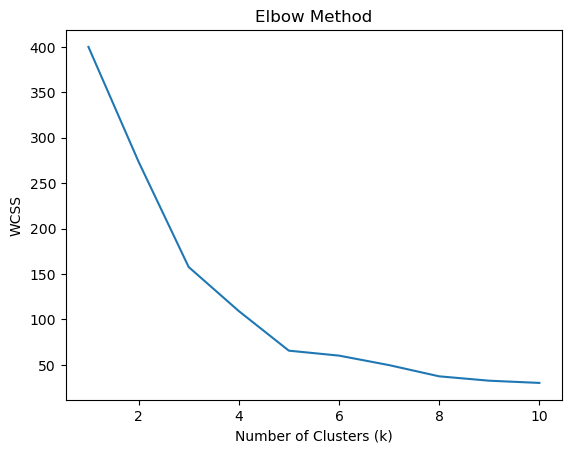

In [12]:
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)


C:\Users\sudha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
df['Cluster'] = labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


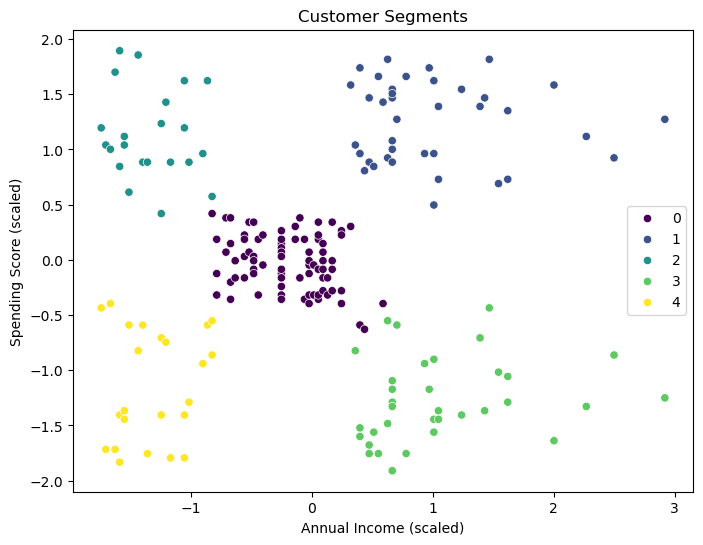

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled[:,0],
    y=X_scaled[:,1],
    hue=labels,
    palette='viridis'
)
plt.title("Customer Segments")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()
